Feature matrix shape: torch.Size([8, 3])
Target vector shape: torch.Size([8, 1])

First 5 (scaled) feature rows:
 tensor([[-0.4162, -0.5000,  1.0436],
        [-0.7946, -0.5000,  0.4870],
        [ 1.8541,  2.0000, -1.6002],
        [-0.0378,  0.7500,  0.2087],
        [-0.0378, -0.5000, -0.3479]])
First 5 target rows:
 tensor([[265.],
        [245.],
        [460.],
        [279.],
        [300.]])

Model architecture:
 MultiLinearReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)
linear.weight: (1, 3)
linear.bias: (1,)
Epoch 500: Train MSE = 64600.8906, Test MSE = 72208.1094
Epoch 1000: Train MSE = 43685.7109, Test MSE = 54422.8750
Epoch 1500: Train MSE = 28179.4961, Test MSE = 39607.9375
Epoch 2000: Train MSE = 17144.3906, Test MSE = 28014.7148
Epoch 2500: Train MSE = 9691.6396, Test MSE = 19020.1523
Epoch 3000: Train MSE = 4999.6104, Test MSE = 12263.7422
Epoch 3500: Train MSE = 2321.6584, Test MSE = 7477.5146
Epoch 4000: Train MSE = 984.7074, Test MSE = 4351.8931


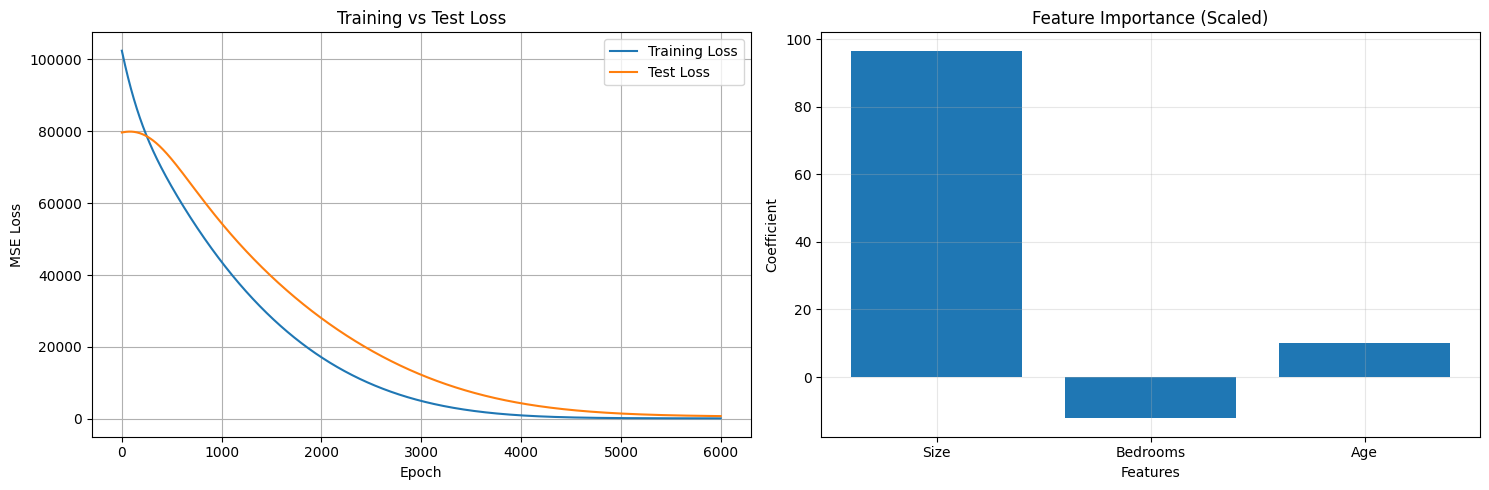

In [13]:
# --------------------
# Import PyTorch and Required Libraries
# --------------------
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --------------------
# HOUSING DATASET: [SIZE (SQFT), BEDROOMS, AGE (YEARS)] -> PRICE ($1000S)
# --------------------
data = np.array([
    [7000., 15., 100.],
    [8000., 15., 75.],
    [8500., 20., 90.],
    [9375., 20., 60.],
    [5500., 10., 150.],
    [7750., 15., 120.],
    [11750., 20., 35.],
    [12250., 25., 25.],
    [7125., 15., 100.],
    [8500., 15., 70.]
], dtype=np.float32)

y_data = np.array([[1225.], [1560.], [1395.], [1540.], [995.], [1325.], [2100.], [2300.], [1250.], [1500.]], dtype=np.float32)

# Feature normalization
scaler = StandardScaler()
scaler.fit(data)
X_normalized = scaler.transform(data)

# --------------------
# Device agnostic code
# --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X = torch.tensor(X_normalized, dtype=torch.float32, device=device)
y = torch.tensor(y_data, dtype=torch.float32, device=device)

# -----------------------
# Train/Test split
# -----------------------
# TODO: Fill in the parameters for train_test_split
X_train, X_test, y_train, y_test = train_test_split(______, ______, test_size=______, random_state=______)

print("Feature matrix shape:", X_train.shape)
print("Target vector shape:", y_train.shape)
print("\nFirst 5 (scaled) feature rows:\n", X_train[:5])
print("First 5 target rows:\n", y_train[:5])

# --------------------
# Build the Multiple Linear Regression Model
# --------------------
class MultiLinearReg(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        # TODO: Define the linear layer
        self.linear = ______

    def forward(self, x):
        # TODO: Implement the forward pass
        return ______

# TODO: Initialize the model with correct input dimension
model = ______.to(device)

print("\nModel architecture:\n", model)
for name, p in model.named_parameters():
    print(f"{name}: {tuple(p.shape)}")

# --------------------
# Define Loss Function and Optimizer
# --------------------
# TODO: Choose appropriate loss function
loss_fn = ______

# TODO: Initialize optimizer with learning rate
optimizer = ______(model.parameters(), lr=______)

# --------------------
# Train the Model
# --------------------
loss_history = []
test_loss_history = []

# TODO: Set number of training epochs
EPOCHS = ______

for epoch in range(EPOCHS):
    # Training phase
    model.______()  # TODO: Set model to training mode
    y_pred = ______  # TODO: Forward pass
    loss = loss_fn(______, ______)  # TODO: Calculate loss between predictions and targets
    optimizer.______()  # TODO: Reset gradients
    loss.______()  # TODO: Backward pass
    optimizer.______()  # TODO: Update weights

    # Testing phase
    model.______()  # TODO: Set model to evaluation mode
    with torch.inference_mode():
        test_pred = ______  # TODO: Forward pass on test data
        test_loss = ______(______, ______)  # TODO: Calculate test loss

        # Track losses for plotting
        loss_history.append(loss.item())
        test_loss_history.append(test_loss.item())

    # TODO: Print progress every 500 epochs
    if (epoch + 1) % ______ == 0:
        print(f"Epoch {epoch+1}: Train MSE = {loss.item():.4f}, Test MSE = {test_loss.item():.4f}")

print("\nTraining completed!")

# --------------------
# Evaluate Model Performance
# --------------------
model.______()  # TODO: Set model to evaluation mode
with torch.no_grad():
    predictions = ______  # TODO: Get predictions on test data

# TODO: Calculate R-squared score
ss_total = torch.sum((______ - ______.mean()) ** 2)
ss_residual = torch.sum((______ - ______) ** 2)
r_squared = 1 - (______ / ______)

print("\nFinal Model Performance:")
print(f"Final Train MSE: {loss_history[-1]:.4f}")
print(f"Final Test MSE: {test_loss_history[-1]:.4f}")
print(f"R-squared Score: {r_squared.item():.4f}")

# TODO: Extract learned weights and bias
print("\nLearned Weights (on SCALED features):")
w = ______.detach().cpu().numpy().flatten()
b = ______.detach().cpu().item()
print(f"weights: {w}")
print(f"bias: {b:.4f}")

# --------------------
# Analyze Predictions
# --------------------
# TODO: Convert tensors to CPU numpy arrays for analysis
Y_cpu = ______.detach().cpu().numpy().flatten()
pred_cpu = ______.detach().cpu().numpy().flatten()

print("\nActual vs Predicted Prices:")
print("Actual\tPredicted\tDiff\tError %")
for a, p in zip(Y_cpu, pred_cpu):
    # TODO: Calculate percentage error
    error_pct = ______
    print(f"{a:.1f}\t{p:.1f}\t\t{(a - p):+.1f}\t{error_pct:+.1f}%")

# --------------------
# Visualization
# --------------------
plt.figure(figsize=(15, 5))

# TODO: Plot training and test loss curves
plt.subplot(1, 2, 1)
plt.plot(______, label='Training Loss')  # TODO: Plot training loss
plt.plot(______, label='Test Loss')     # TODO: Plot test loss
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Test Loss')
plt.legend()
plt.grid(True)

# TODO: Plot feature importance
plt.subplot(1, 2, 2)
features = ['Size', 'Bedrooms', 'Age']
plt.bar(______, ______)  # TODO: Plot feature coefficients
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance (Scaled)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --------------------
# BONUS CHALLENGES:
# --------------------
# 1. Try different learning rates (0.001, 0.01, 0.1) and observe convergence
# 2. Experiment with different numbers of epochs (1000, 3000, 6000)
# 3. Try different optimizers (SGD, Adam, RMSprop)
# 4. Add early stopping to prevent overfitting
# 5. Modify the model to include a hidden layer for nonlinear relationships